# Assignment 2
I have implemented the Medical Insurance Price Prediction using Linear Regression algorithm from scratch in Python using Numpy and Pandas and Matplotlib for visualization.
The algorithm must be implemented as a function with arguments, x_train (the features) and y_train (the output). 

# We will begin by importing the lib for visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Reading the data for Medical Insurance Price Prediction

In [2]:
# we have added the medical data as the data frame along with its address
df = pd.read_csv("Data/Medical Price Dataset.csv")

In [3]:
# we have printed the medical data but only the head part which has 0 to 5 rows only
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape # For the total number of rows and columns

(1338, 7)

In [5]:
df.info() # for information of the data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# DATA ANALYSIS

In [6]:
# statistical Measures of the dataset which will help us to understand the analysis
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Firstly we will use the correlation Heatmap to understand and analysis the Medical data
<b> Charges are most correlated with age and BMI, which makes sense as these can influence healthcare needs.</b>
<b> Children doesn't correlate much with any feature </b> , possibly indicating it doesn't play a significant role in healthcare charges (in this dataset). <b>
As age increases, medical charges tend to increase moderately.
Higher BMI may be associated with slightly higher charges.</b> 

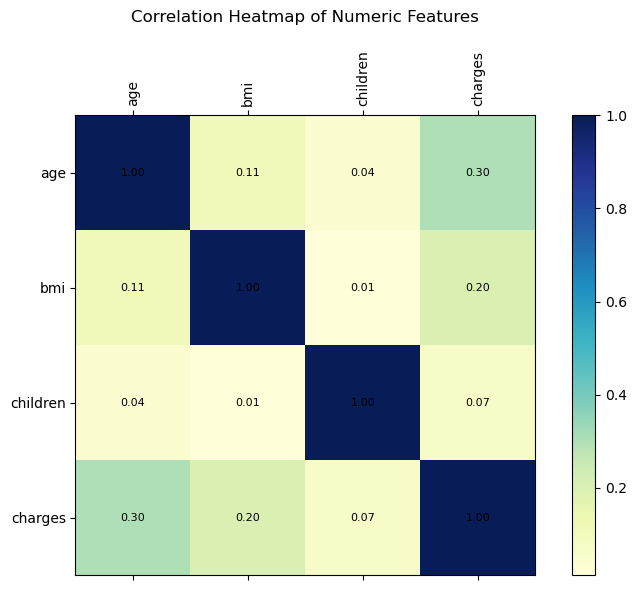

In [7]:
# Filter only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap="YlGnBu")  

# Add colorbar
plt.colorbar(cax)

# Set axis ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Annotate the cells with correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        ax.text(j, i, f"{value:.2f}",  va='center', ha='center',color='black', fontsize=8)

plt.title("Correlation Heatmap of Numeric Features", pad=20)
plt.tight_layout()
plt.show()


# Secondly we will see the correlation between the Age and the Medical Charge
We can clearly see that <b> the old-age people have more charges and the children does not have that much and middle-age people have the avearge </b>  of both but there are some who has the charge more as much as the old people.

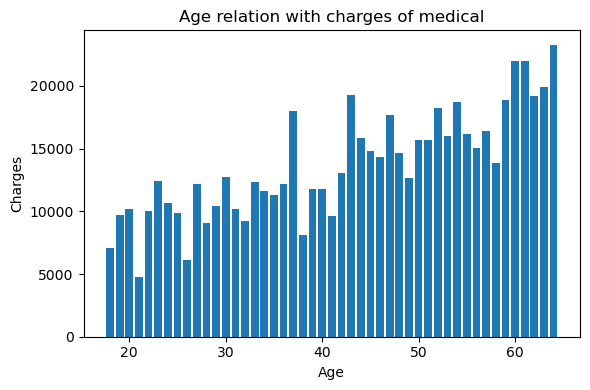

In [8]:

# Calculate the mean charges per Age
grouped_data = df.groupby("age")["charges"].mean().reset_index()

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(grouped_data["age"], grouped_data["charges"])

# Labeling
ax.set_xlabel("Age")
ax.set_ylabel("Charges")
ax.set_title("Age relation with charges of medical")

plt.tight_layout()
plt.show()

<b> More the age more is the Medical Charge </b>

# Then did the analysis of the Sex with respect to the Medical charge
The amount or count of male and female are almost same but <b> the charge for male are more then the females at some area otherwise,they are same.  </b>

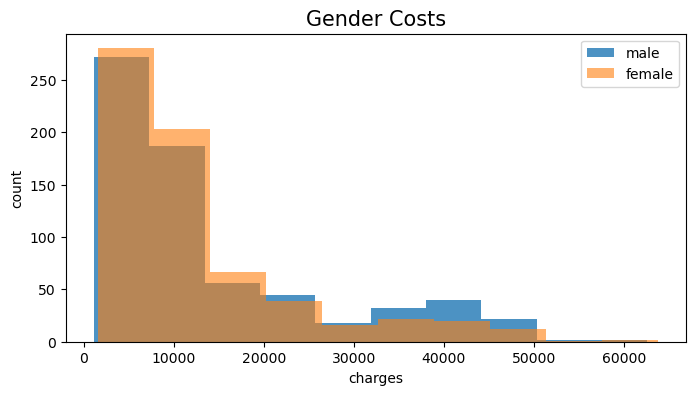

In [9]:
# male female related to the charge
fig = plt.figure(figsize=(8,4))
plt.hist(data =df[df['sex'] =='male'] ,  x = 'charges' ,label = 'male', alpha = 0.8 )
plt.hist(data =df[df['sex'] =='female'] ,  x = 'charges',label = 'female' ,alpha = 0.6)
plt.title('Gender Costs',size = 15)
plt.ylabel('count')
plt.xlabel('charges')
plt.legend()
plt.show() 


# Then the relationship between BMI (Body Mass Index) and Medical charges.
<b> Most of the higher charges seem to cluster around BMI values between 30 and 45.</b>
This could suggest that individuals with overweight or obese BMI ranges often incur higher medical costs.
<b> Fewer individuals in this range, and charges are relatively low. </b>
Possibly represents healthier or younger individuals with fewer medical needs.



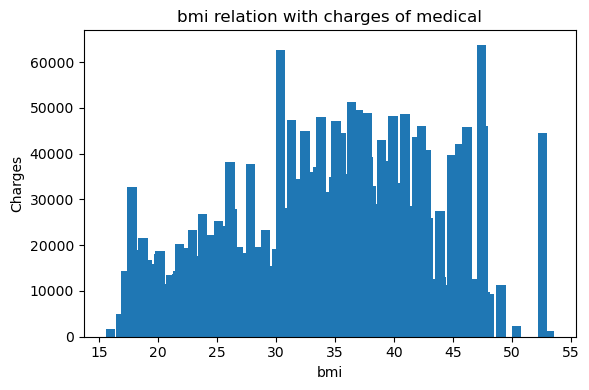

In [10]:
# Calculate the mean charges per sex
grouped_data = df.groupby("bmi")["charges"].mean().reset_index()

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(grouped_data["bmi"], grouped_data["charges"])

# Labeling
ax.set_xlabel("bmi")
ax.set_ylabel("Charges")
ax.set_title("bmi relation with charges of medical")

plt.tight_layout()
plt.show()

From this graph alone, it appears there's a slight positive trend: <b> as BMI increases, so can medical charges.</b>
However, it's not strongly linear. This matches your earlier correlation heatmap where BMI vs Charges = 0.20 <b> (weak positive correlation).</b>

# Then the relationship between Children they have and Medical charges.
We can see that <b> the 2-3 children people have more charges then anyone and the 5 children has the lowest charges.</b>

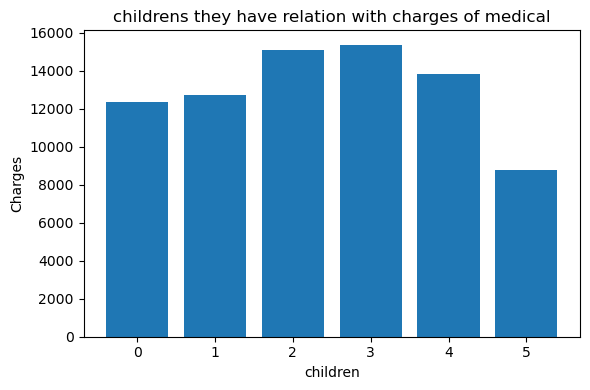

In [11]:
# Calculate the mean charges per children they have 
grouped_data = df.groupby("children")["charges"].mean().reset_index()

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(grouped_data["children"], grouped_data["charges"])

# Labeling
ax.set_xlabel("children")
ax.set_ylabel("Charges")
ax.set_title("childrens they have relation with charges of medical")

plt.tight_layout()
plt.show()

# The correlation between the Smoker and the Medical charges
<b> It is very clear that the smoker person have more charges then a non-smoker person.</b>

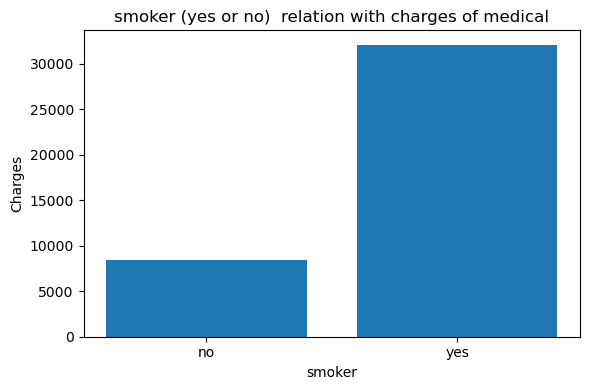

In [12]:
# Calculate the mean charges per smoker wheather they smoke or not
grouped_data = df.groupby("smoker")["charges"].mean().reset_index()

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(grouped_data["smoker"], grouped_data["charges"])

# Labeling
ax.set_xlabel("smoker")
ax.set_ylabel("Charges")
ax.set_title("smoker (yes or no)  relation with charges of medical")

plt.tight_layout()
plt.show()

# The correlation between the Region and the Medical charges
We have 4 regions northeast, northwest, southeast, southwest and we can clearly see that <b> the southeast people have more charge then rest of the people.</b>

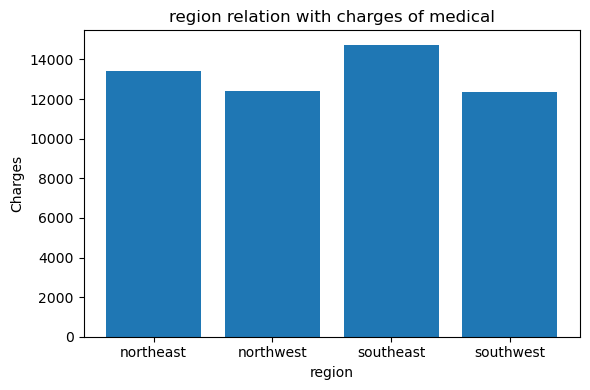

In [13]:
# Calculate the mean charges per region where they live 
grouped_data = df.groupby("region")["charges"].mean().reset_index()

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(grouped_data["region"], grouped_data["charges"])

# Labeling
ax.set_xlabel("region")
ax.set_ylabel("Charges")
ax.set_title("region relation with charges of medical")

plt.tight_layout()
plt.show()

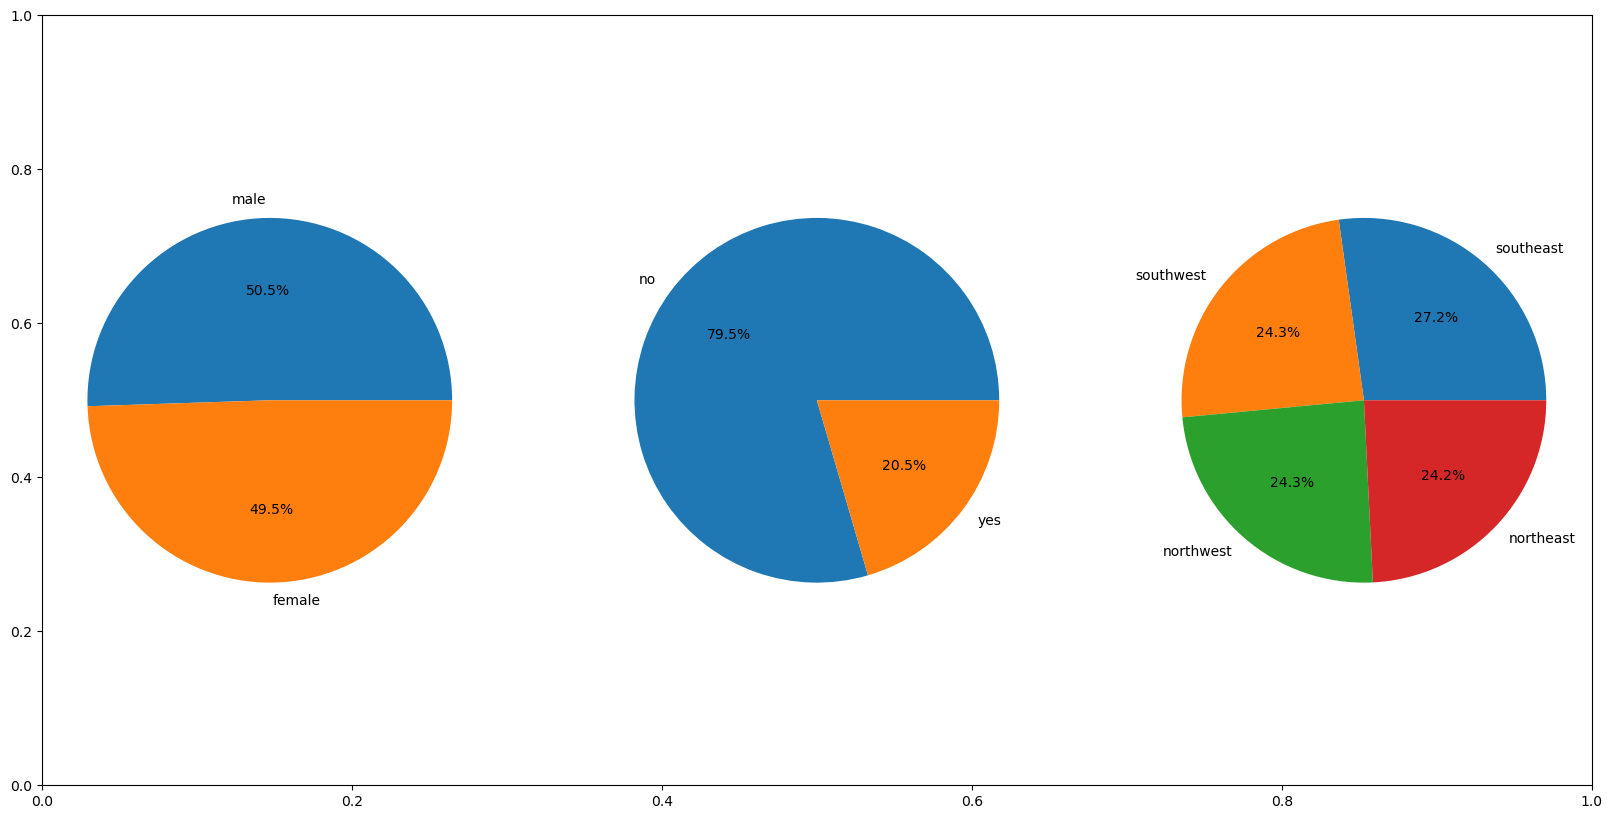

In [14]:
# For some extra visulization 
features = ['sex', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
  
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
  
plt.show()

In [15]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<b> The above data represents that there are no missing values so we do not need any kind of imputation </b>

# ENCODING

In [16]:
df['Bin_sex'] = df['sex'].apply(lambda x: 0 if x=='male' else 1) # we made a new parameter for sex
df['Bin_smoker'] = df['smoker'].apply(lambda x: 0 if x=='yes' else 1) # we made a new parameter for the smoker

In [17]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
# we made a new parameter for the the region
df['Enc_region'] = df['region'].apply(lambda x: 0 if x=='northeast' else( 1 if x=='northwest' else( 2 if x=='southwest' else 2)))  

In [19]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,Bin_sex,Bin_smoker,Enc_region
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,2
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1
5,31,female,25.740,0,no,southeast,3756.62160,1,1,2
6,46,female,33.440,1,no,southeast,8240.58960,1,1,2
7,37,female,27.740,3,no,northwest,7281.50560,1,1,1
8,37,male,29.830,2,no,northeast,6406.41070,0,1,0
9,60,female,25.840,0,no,northwest,28923.13692,1,1,1


# MULTIPLE LINEAR REGRESSION ALGORITHM 
Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.
It assumes that there is a linear relationship between the input and output, meaning the output changes at a constant rate as the input changes. This relationship is represented by a straight line <b> It includes methods for training, testing, prediction, and plotting the loss curve. </b>

In [20]:
# Defines a custom class to implement the multiple linear regression model.
class multipleLinearRegression():

  def __init__(self):
    #No instance Variables required as we are passing everything as arguments
    pass
# forward method
  def forward(self,X,y,W):  # W is the weight vector and Y is the true output (dependent)
                            # X is the feature vector
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred
# updateweights methods
  def updateWeights(self,X,y_pred,y_true,W,alpha,index):

    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W
# train method
  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):

    num_rows = X.shape[0]       # Number of Rows
    num_cols = X.shape[1]       # Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows)    # Weight Initialization

    # Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []    # epoch is one complete pass through the entire training dataset
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs
# test method
  def test(self, X_test, y_test, W_trained):
      
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    
# predict method
  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

# plot loss method (Simple matplotlib line plot of loss vs epochs.)
  def plotLoss(self, loss, epochs):
   
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()

# r2_score function ( Calculates Pearson correlation coefficient and squares it to get the R² (coefficient of determination))
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

# DROPPING COLUMNS

In [21]:
df.drop(df.query('bmi > 50').index, axis=0, inplace=True)
df.drop(df.query('charges > 50000').index, axis=0, inplace=True)

dfcpy = df[['age', 'bmi', 'Bin_smoker', 'Enc_region', 'charges']].copy()   # copy 

dfcpy['age'] = np.log1p(dfcpy['age'])   # log1p(x) = log(1 + x)
dfcpy['bmi'] = np.log1p(dfcpy['bmi'])

# Split the Data 50% training and 50% testing randomly
training_data = dfcpy.sample(frac=0.5, random_state=41)
# Drops the training rows which then remaining 50% becomes testing data.
testing_data = dfcpy.drop(training_data.index)

X_train = training_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values

X_test = testing_data.iloc[:, :-1].values
Y_test = testing_data.iloc[:, -1].values


In [22]:
dfcpy.head(10)

,age,bmi,Bin_smoker,Enc_region,charges
0,2.995732,3.363842,0,2,16884.92400
1,2.944439,3.548755,1,2,1725.55230
2,3.367296,3.526361,1,2,4449.46200
3,3.526361,3.165686,1,1,21984.47061
4,3.496508,3.397189,1,1,3866.85520
5,3.465736,3.286161,1,2,3756.62160
6,3.850148,3.539219,1,2,8240.58960
7,3.637586,3.358290,1,1,7281.50560
8,3.637586,3.428488,1,0,6406.41070
9,4.110874,3.289893,1,1,28923.13692


# TRAINING AND TESTING THE MODEL

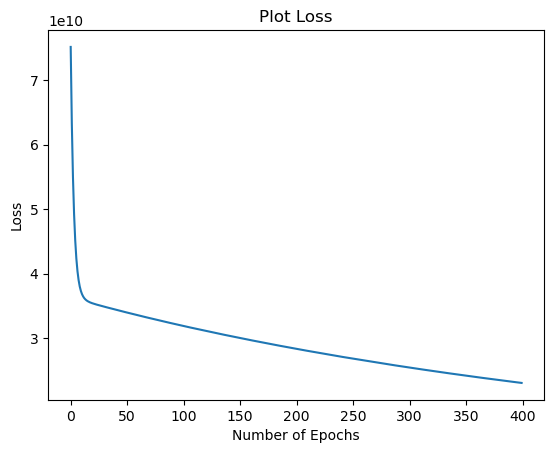

In [23]:
# Training
regressor = multipleLinearRegression()
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=400, alpha=0.00001)

# Testing  
test_pred, test_loss = regressor.test(X_test, Y_test, W_trained)

# Plotting the Loss Curve
regressor.plotLoss(train_loss, num_epochs) 

Accuracy: 0.971703454849784


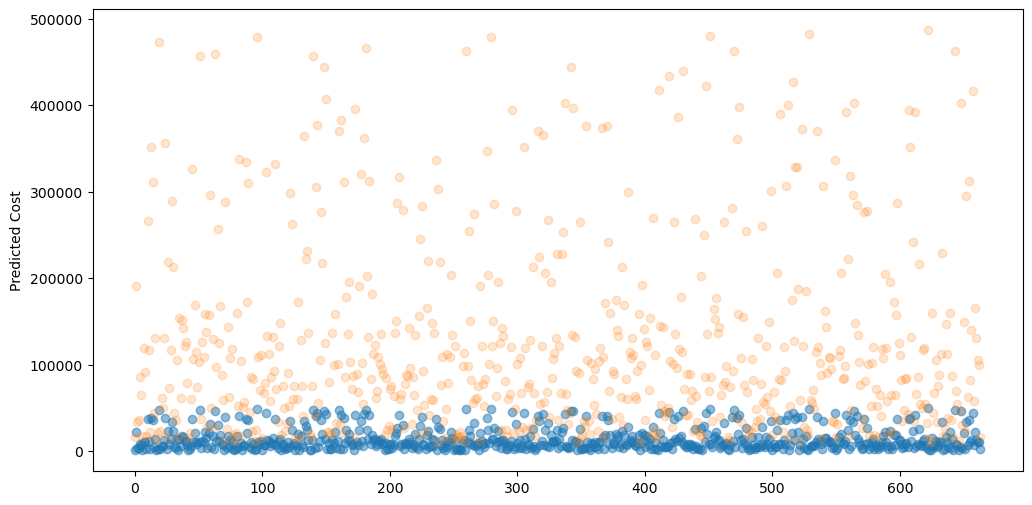

In [24]:
# Accuracy 
accu = r2_score(Y_test, test_pred)
print("Accuracy:", accu)


# Actual vs Predicted scatter plot
fig = plt.figure(figsize=(12,6))
plt.scatter([i for i in range(len(Y_test))],Y_test,alpha=0.5)
plt.scatter([i for i in range(len(Y_test))],test_pred,alpha=0.2)
plt.ylabel('Predicted Cost')
plt.show() 